# 第8章: 機械学習

本章では，Bo Pang氏とLillian Lee氏が公開している[Movie Review Data](http://www.cs.cornell.edu/people/pabo/movie-review-data/)の[sentence polarity dataset v1.0](http://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.README.1.0.txt)を用い，文を肯定的（ポジティブ）もしくは否定的（ネガティブ）に分類するタスク（極性分析）に取り組む．

### nltk
https://pythonspot.com/en/tokenizing-words-and-sentences-with-nltk/

In [1]:
#import nltk
#nltk.download()

In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize
 
data = "All work and no play makes jack dull boy. All work and no play makes jack a dull boy."
sent = sent_tokenize(data)
print(sent)
words = word_tokenize(data)
print(words)

['All work and no play makes jack dull boy.', 'All work and no play makes jack a dull boy.']
['All', 'work', 'and', 'no', 'play', 'makes', 'jack', 'dull', 'boy', '.', 'All', 'work', 'and', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy', '.']


## 70. データの入手・整形
[文に関する極性分析の正解データ](http://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.tar.gz)を用い，以下の要領で正解データ（sentiment.txt）を作成せよ．

1. rt-polarity.posの各行の先頭に"+1 "という文字列を追加する（極性ラベル"+1"とスペースに続けて肯定的な文の内容が続く）
2. rt-polarity.negの各行の先頭に"-1 "という文字列を追加する（極性ラベル"-1"とスペースに続けて否定的な文の内容が続く）
3. 上述1と2の内容を結合（concatenate）し，行をランダムに並び替える

sentiment.txtを作成したら，正例（肯定的な文）の数と負例（否定的な文）の数を確認せよ．

In [3]:
%%bash
wc -l ./data/rt-polarity.pos
wc -l ./data/rt-polarity.neg

5331 ./data/rt-polarity.pos
5331 ./data/rt-polarity.neg


In [4]:
!head -5 ./data/rt-polarity.pos

the rock is destined to be the 21st century's new " conan " and that he's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal . 
the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson's expanded vision of j . r . r . tolkien's middle-earth . 
effective but too-tepid biopic
if you sometimes like to go to the movies to have fun , wasabi is a good place to start . 
emerges as something rare , an issue movie that's so honest and keenly observed that it doesn't feel like one . 


In [5]:
!head -5 ./data/rt-polarity.neg

simplistic , silly and tedious . 
it's so laddish and juvenile , only teenage boys could possibly find it funny . 
exploitative and largely devoid of the depth or sophistication that would make watching such a graphic treatment of the crimes bearable . 
[garbus] discards the potential for pathological study , exhuming instead , the skewed melodrama of the circumstantial situation . 
a visually flashy but narratively opaque and emotionally vapid exercise in style and mystification . 


In [6]:
!nkf -g ./data/rt-polarity.pos

BINARY


In [7]:
import chardet

with open('./data/rt-polarity.pos', 'rb') as f:
    print(chardet.detect(f.read()))

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [8]:
with open('./data/rt-polarity.pos', 'rb') as fi, open('data/rt-polarity-pos.txt', 'w', encoding='utf-8') as fo:
    fo.write(fi.read().decode('Windows-1252'))
with open('./data/rt-polarity.neg', 'rb') as fi, open('data/rt-polarity-neg.txt', 'w', encoding='utf-8') as fo:
    fo.write(fi.read().decode('Windows-1252'))

In [9]:
import random

pos_list = []
neg_list = []

with open('./data/rt-polarity-pos.txt',  'r') as fp:
    for line in fp:
        pos_list.append('+1 '+ line.rstrip())

with open('./data/rt-polarity-neg.txt', 'r') as fn:
     for line in fn:
        neg_list.append('-1 '+ line.rstrip())

sent_list = pos_list + neg_list
random.shuffle(sent_list)

with open('./work/sentiment.txt', 'w') as fs:
    for sent in sent_list:
        fs.write(sent + '\n')

In [10]:
!head ./work/sentiment.txt

+1 exquisitely acted and masterfully if preciously interwoven… [the film] addresses in a fascinating , intelligent manner the intermingling of race , politics and local commerce .
-1 julia is played with exasperating blandness by laura regan .
+1 the director , steven shainberg , has succeeded by focusing intently on his characters , making them quirky individuals rather than figures of fun .
-1  . . . better described as a ghost story gone badly awry .
+1 the powerful success of read my lips with such provocative material shows why , after only three films , director/co-writer jacques audiard , though little known in this country , belongs in the very top rank of french filmmakers .
+1 though it lacks the utter authority of a genre gem , there's a certain robustness to this engaging mix of love and bloodletting .
+1 swimming is above all about a young woman's face , and by casting an actress whose face projects that woman's doubts and yearnings , it succeeds .
+1 anyone who welcomes a

In [11]:
pos_num = 0
neg_num = 0

with open('./work/sentiment.txt', 'r') as f:
    for line in f:
        if line[0] == '+':
            pos_num += 1
        elif line[0] == '-':
            neg_num += 1
        else:
            print('There is a sentence which is neither positive nor negative : ' + line.rstrip())
            
print('pos : ' + str(pos_num) + '\t' + 'neg' + str(neg_num))
        

pos : 5331	neg5331


## 71. ストップワード
英語のストップワードのリスト（ストップリスト）を適当に作成せよ．さらに，引数に与えられた単語（文字列）がストップリストに含まれている場合は真，それ以外は偽を返す関数を実装せよ．さらに，その関数に対するテストを記述せよ．

https://pythonspot.com/nltk-stop-words/

In [12]:
from nltk.corpus import stopwords

stopWords = set(stopwords.words('english'))

def is_stopword(word):
    return word.lower() in stopWords

In [13]:
print(stopWords)
print(len(stopWords))

{'not', 'below', 'wasn', 'has', 'a', 'having', 'those', 'been', 'll', 'who', 'weren', 'hadn', 'herself', 'its', 'did', 'yourself', 'y', "she's", "should've", 'up', 'what', 'more', 'whom', "haven't", 'themselves', 'needn', 'all', 'were', 'as', 'o', 'you', 'into', 'mightn', 'to', 'it', 'off', 'himself', 'her', 'where', 'no', 'yours', 'between', 'once', 'why', 'against', 'but', 'after', 'above', 'am', "hadn't", 'she', 'the', 'their', 'm', 'nor', "wouldn't", 'doesn', 'shouldn', 'have', 'there', 'ours', "you'd", 're', 'at', 'of', 'this', 'that', 'his', 'too', "weren't", 'will', 'and', 'shan', 'doing', 'them', 'when', 'before', 'any', 'if', "don't", "shan't", 'hers', 'about', 'him', 'few', 'your', 'in', 'isn', 'won', 'are', "you'll", 'they', 'aren', "mustn't", 'other', "won't", 'most', 'over', 'don', 'by', 'further', "didn't", "you've", 'ain', 'i', "isn't", 'is', 'own', 'haven', 'hasn', 'during', 'same', "couldn't", "shouldn't", 'he', 'these', 't', 'an', 'through', 'me', 'until', 'some', 'sh

In [14]:
assert is_stopword('you')
assert is_stopword('You')
assert is_stopword('.')

AssertionError: 

In [15]:
new_stop_words = stopWords | {',', '.', '!', '?'}
print(new_stop_words)
print(len(new_stop_words))

{'not', 'below', 'wasn', 'has', 'a', '?', 'having', 'those', 'been', 'll', 'who', 'weren', 'hadn', 'herself', 'its', 'did', 'yourself', 'y', "she's", "should've", 'up', 'what', 'more', 'whom', "haven't", 'themselves', 'needn', 'all', 'were', 'as', 'o', 'you', 'into', 'mightn', 'to', 'it', 'off', 'himself', 'her', 'where', 'no', '!', 'yours', 'between', 'once', 'why', 'against', 'but', 'after', 'above', 'am', "hadn't", 'she', 'the', 'their', 'm', 'nor', "wouldn't", 'doesn', 'shouldn', 'have', 'there', 'ours', "you'd", 're', 'at', 'of', 'this', 'that', 'his', 'too', "weren't", 'will', 'and', 'shan', 'doing', 'them', 'when', 'before', 'any', 'if', "don't", "shan't", 'hers', 'about', 'him', 'few', 'your', 'in', 'isn', 'won', 'are', "you'll", 'they', 'aren', "mustn't", 'other', "won't", 'most', 'over', 'don', 'by', 'further', "didn't", "you've", 'ain', 'i', "isn't", 'is', 'own', 'haven', 'hasn', 'during', 'same', "couldn't", "shouldn't", '.', 'he', 'these', 't', 'an', 'through', 'me', 'unti

In [16]:
def is_stopword_v2(word):
    return word.lower() in new_stop_words

In [17]:
assert is_stopword_v2('you')
assert is_stopword_v2('You')
assert is_stopword_v2('.')

In [18]:
def test_is_stopword():
    assert is_stopword('you')
    assert is_stopword('You')
    assert is_stopword('.')
    
def test_is_stopword_v2():
    assert is_stopword_v2('you')
    assert is_stopword_v2('You')
    assert is_stopword_v2('.')

In [19]:
!pytest

============================= test session starts ==============================
platform darwin -- Python 3.6.4, pytest-3.3.2, py-1.5.2, pluggy-0.6.0
rootdir: /Users/kitayama/100knock-2018/kkitayama/chapter08, inifile:
collected 0 items                                                              

========================= no tests ran in 0.00 seconds =========================


## 72. 素性抽出
極性分析に有用そうな素性を各自で設計し，学習データから素性を抽出せよ．素性としては，レビューからストップワードを除去し，各単語をステミング処理したものが最低限のベースラインとなるであろう．

https://www.haya-programming.com/entry/2018/03/25/203836

In [20]:
 from nltk.stem.lancaster import LancasterStemmer

def extract_features(text, stemmer=LancasterStemmer()):
    words = text.split()
    words_filtered = [word for word in words if not is_stopword_v2(word)]
    features = [stemmer.stem(word) for word in words_filtered]
    return ' '.join(features)

In [21]:
from itertools import islice

with open('./work/sentiment.txt') as f:
    for line in islice(f, 5):
        print(line.rstrip())

+1 exquisitely acted and masterfully if preciously interwoven… [the film] addresses in a fascinating , intelligent manner the intermingling of race , politics and local commerce .
-1 julia is played with exasperating blandness by laura regan .
+1 the director , steven shainberg , has succeeded by focusing intently on his characters , making them quirky individuals rather than figures of fun .
-1  . . . better described as a ghost story gone badly awry .
+1 the powerful success of read my lips with such provocative material shows why , after only three films , director/co-writer jacques audiard , though little known in this country , belongs in the very top rank of french filmmakers .


In [22]:
from itertools import islice

with open('./work/sentiment.txt') as f:
    for line in islice(f, 5):
        print(extract_features(line.rstrip()))

+1 exquisit act mast precy interwoven… [the film] address fascin intellig man intermingl rac polit loc commerc
-1 jul play exasp bland laur reg
+1 direct stev shainberg success focus int charact mak quirky individ rath fig fun
-1 bet describ ghost story gon bad awry
+1 pow success read lip provoc mat show three film director/co-writ jacqu audiard though littl known country belong top rank french filmmak


## 73. 学習
72で抽出した素性を用いて，ロジスティック回帰モデルを学習せよ．

In [23]:
labels = []
texts = []

with open('./work/sentiment.txt') as f:
    for line in f:
        label, text = line.strip().split(' ', 1)   # 最大分割数を指定
        labels.append(int(label))
        texts.append(text)

In [24]:
print(labels[:5])
print(texts[:5])

[1, -1, 1, -1, 1]
['exquisitely acted and masterfully if preciously interwoven… [the film] addresses in a fascinating , intelligent manner the intermingling of race , politics and local commerce .', 'julia is played with exasperating blandness by laura regan .', 'the director , steven shainberg , has succeeded by focusing intently on his characters , making them quirky individuals rather than figures of fun .', ' . . . better described as a ghost story gone badly awry .', 'the powerful success of read my lips with such provocative material shows why , after only three films , director/co-writer jacques audiard , though little known in this country , belongs in the very top rank of french filmmakers .']


### preprocessor : callable or None (default)
`Override the preprocessing (string transformation) stage while preserving the tokenizing and n-grams generation steps.`

### CountVectorizer.fit_transform(raw_documents[, y])
`Learn the vocabulary dictionary and return term-document matrix.`

### LogisticRegression.fit(raw_documents[, y])	
`fit(X, y[, sample_weight])	Fit the model according to the given training data.`

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.fit

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

CV = CountVectorizer(preprocessor=extract_features)
texts_train = CV.fit_transform(texts)

clf = LogisticRegression()
clf.fit(texts_train, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 74. 予測
73で学習したロジスティック回帰モデルを用い，与えられた文の極性ラベル（正例なら"+1"，負例なら"-1"）と，その予測確率を計算するプログラムを実装せよ．

### LogisticRegression.predict_proba(X)	
`Probability estimates.`

In [31]:
scores = clf.predict_proba(texts_train)
print(scores)

[[0.09837286 0.90162714]
 [0.94638011 0.05361989]
 [0.22742488 0.77257512]
 ...
 [0.33937232 0.66062768]
 [0.80109917 0.19890083]
 [0.47456941 0.52543059]]


🤔？

In [32]:
scores = clf.predict_proba(texts_train).max(axis=1)   # "+1" or "-1"のスコアの高い方をとる
print(scores)

[0.90162714 0.94638011 0.77257512 ... 0.66062768 0.80109917 0.52543059]


In [33]:
index_array = clf.predict_proba(texts_train).argmax(axis=1)
print(index_array)
print(clf.classes_)
classes = clf.classes_[index_array]
print(classes)

[1 0 1 ... 1 0 1]
[-1  1]
[ 1 -1  1 ...  1 -1  1]


### self.classes_はfitの関数内で定義されている？
https://github.com/scikit-learn/scikit-learn/blob/55bf5d9/sklearn/feature_extraction/text.py#L986

## 75. 素性の重み
73で学習したロジスティック回帰モデルの中で，重みの高い素性トップ10と，重みの低い素性トップ10を確認せよ．

### CountVectorizer.get_feature_names()
`Array mapping from feature integer indices to feature name.`

In [57]:
feature_names = CV.get_feature_names()
print(feature_names[:5])
print(feature_names[-5:])

['00', '000', '007', '10', '100']
['ótimo', 'último', 'últimos', 'únic', 'único']


### LogisticRegression.coef_
`coef_ is of shape (1, n_features) when the given problem is binary. In particular, when multi_class=’multinomial’, coef_ corresponds to outcome 1 (True) and -coef_ corresponds to outcome 0 (False).`

In [58]:
feature_indices = clf.coef_[0].argsort()   # インデックスを返す
high_feature_indices = feature_indices[-10:][::-1]
low_feature_indices = feature_indices[:10]
print(high_feature_indices)
print(low_feature_indices)
print(clf.coef_[0][high_feature_indices])
print(clf.coef_[0][low_feature_indices])

[ 8686  3512 11308  3703  9762  9756  8742 11732  8469  9864]
[ 1349  3262 11750  7193  6669  9019  3817   623  5360  8030]
[2.3463304  2.28292776 1.96976482 1.80173532 1.73672901 1.6896072
 1.65871173 1.60151371 1.59458244 1.56190064]
[-2.21658024 -1.96983402 -1.92579857 -1.84041056 -1.82879803 -1.82044084
 -1.81572606 -1.76888635 -1.72813444 -1.70017431]


In [59]:
print('重みの高い素性トップ10')
print(feature_names[high_feature_indices])
print('重みの低い素性トップ10')
print(feature_names[low_feature_indices])

重みの高い素性トップ10


TypeError: only integer scalar arrays can be converted to a scalar index

### np.arrayならそのままindexとしてとれる

In [62]:
import numpy as np

feature_names = np.array(CV.get_feature_names())
print(feature_names[:5])
print(feature_names[-5:])

print('重みの高い素性トップ10')
print(feature_names[high_feature_indices])
print('重みの低い素性トップ10')
print(feature_names[low_feature_indices])

['00' '000' '007' '10' '100']
['ótimo' 'último' 'últimos' 'únic' 'único']
重みの高い素性トップ10
['refresh' 'engross' 'unexpect' 'examin' 'smart' 'sly' 'remark' 'warm'
 'quiet' 'solid']
重みの低い素性トップ10
['bor' 'dul' 'wast' 'neith' 'mediocr' 'routin' 'fail' 'app' 'incoh' 'plod']


## 76. ラベル付け
学習データに対してロジスティック回帰モデルを適用し，正解のラベル，予測されたラベル，予測確率をタブ区切り形式で出力せよ．

In [63]:
#　ryo-tさんの74の関数

def predict_with_proba(clf, X):
    """Predict classes for X with probabilities using given classifier
    
    Returns: predicted classes and scores
    """
    proba = clf.predict_proba(X)
    scores = proba.max(axis=1)
    indices = proba.argmax(axis=1)
    classes = clf.classes_[indices]
    return classes, scores

In [66]:
pred, score = predict_with_proba(clf, texts_train)

In [67]:
import pandas as pd

result = pd.DataFrame(list(zip(*[labels, pred, score])), columns=['GT', 'pred', 'score'])
result.head()

,GT,pred,score
0,1,1,0.901627
1,-1,-1,0.946380
2,1,1,0.772575
3,-1,-1,0.979001
4,1,1,0.977662


#### どれがどの変数なのか分からなくなってきた...

## 77. 正解率の計測
76の出力を受け取り，予測の正解率，正例に関する適合率，再現率，F1スコアを求めるプログラムを作成せよ．

### sklearn.metrics
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [69]:
from sklearn import metrics

print('accuracy:', metrics.accuracy_score(labels, pred), sep='\t')
print('precision:', metrics.precision_score(labels, pred), sep='\t')
print('recall:', metrics.recall_score(labels, pred), sep='\t')
print('F1:', metrics.f1_score(labels, pred), sep='\t')

accuracy:	0.9355655599324705
precision:	0.9384441087613293
recall:	0.9322828737572688
F1:	0.9353533452526583


## 78. 5分割交差検定
76-77の実験では，学習に用いた事例を評価にも用いたため，正当な評価とは言えない．すなわち，分類器が訓練事例を丸暗記する際の性能を評価しており，モデルの汎化性能を測定していない．そこで，5分割交差検定により，極性分類の正解率，適合率，再現率，F1スコアを求めよ．


### sklearn.pipeline.Pipeline
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
### sklearn.model_selection.cross_validate
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

model = Pipeline([
    ('cv', CountVectorizer(preprocessor=extract_features)),
    ('lr', LogisticRegression(random_state=0)),
])

cross_validate(model, texts, labels, cv=5,
               scoring=['accuracy', 'precision', 'recall', 'f1'])

/Users/kitayama/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/kitayama/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_f1'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/kitayama/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(

{'fit_time': array([2.70932603, 2.63963795, 2.74212527, 2.54689312, 2.59174013]),
 'score_time': array([2.43916202, 2.51742101, 2.42883301, 2.42618299, 2.43475294]),
 'test_accuracy': array([0.75351453, 0.74249531, 0.74296435, 0.75469043, 0.74765478]),
 'test_f1': array([0.75670675, 0.73567646, 0.74440299, 0.75640429, 0.74209012]),
 'test_precision': array([0.74703196, 0.75568744, 0.74025974, 0.75115634, 0.75882353]),
 'test_recall': array([0.76663543, 0.71669794, 0.74859287, 0.76172608, 0.7260788 ]),
 'train_accuracy': array([0.94488743, 0.94255569, 0.94255569, 0.94490035, 0.94466589]),
 'train_f1': array([0.94469287, 0.94231222, 0.9423936 , 0.94466682, 0.94453584]),
 'train_precision': array([0.94803968, 0.94632301, 0.94506013, 0.94868763, 0.9467609 ]),
 'train_recall': array([0.94136961, 0.93833529, 0.93974209, 0.94067995, 0.94232122])}

## 79. 適合率-再現率グラフの描画
ロジスティック回帰モデルの分類の閾値を変化させることで，適合率-再現率グラフを描画せよ．

Text(0.5,1,'Precision-Recall curve: AUC=0.81')

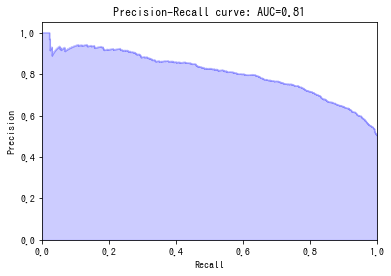

In [78]:
# 丸パクリ

%matplotlib inline
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(texts, labels, random_state=0)

model.fit(X_train, y_train)

precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
average_precision = average_precision_score(y_test, model.predict_proba(X_test)[:, 1])

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AUC={0:0.2f}'.format(average_precision))